In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Последовательное обнаружение разладок временных рядов

1. Всюду в рассматриваемых задачах
имеется две гипотезы $\mathbb{H}_0$ и $\mathbb{H}_1$ 
(иногда они обозначаются $\mathbb{H}_{\infty}$ и
$\mathbb{H}_0$, соответственно), причем каждая 
из гипотез делает явные предположения о распределении
или его параметрах.
\item Критерий Неймана-Пирсона предписывает
принимать гипотезу исходя из значения величины
$$
L_n(X_1, \ldots, X_n) = \frac{f_0(X_1, \ldots, X_n)}{f_{\infty}(X_1, \ldots, X_n)},
$$
называемой отношением правдоподобия.
А именно, пусть $\varphi(X_1, \ldots, X_n)$~-- 
рандомизированное решающее правило, значение
которого равно вероятности принять 
гипотезу $\mathbb{H}_1$. Тогда найдутся такие
константы $\lambda_a$ и $h_a$, что 
$$
\varphi(X_1, \ldots, X_n) = 
\begin{cases}
    1, & L_n(X_1, \ldots, X_n) > h_a, \\
    \lambda_a, & L_n(X_1, \ldots, X_n) = h_a, \\
    0, & L_n(X_1, \ldots, X_n) < h_a,
\end{cases}
$$
является наиболее мощным 
(т.е. с наименьшей вероятностью пропуска цели 
или ошибки 2 рода $\beta(\varphi)$) тестом 
среди тестов, вероятность ложной
тревоги $\alpha(\varphi)$
(ошибки 1 рода) которых не выше $a$.

2. Разладкой процесса $X_t$
называется ситуация, в которой траектория
процесса генерируется двумя (или 
в общем случае несколькими) независимыми
вероятностными мерами $\mathrm{P}_{\infty}$
и $\mathrm{P}_{0}$, причем наблюдения имеют структуру
$$
X_n = 
\begin{cases}
    X^{\infty}_n, & \text{если } 1 \leqslant n < \theta, \\
    X^{0}_n, & \text{если } n \geqslant \theta,
\end{cases}
$$
где $X^{\infty}_t$ --- 
процесс, соответствующий мере $\mathrm{P}_{\infty}$,
и $X^{0}_t$ ---
процесс, соответствующий мере $\mathrm{P}_{0}$.
Момент $\theta \in [0, \infty]$
называется моментом разладки, причем
ситуация $\theta = 0$ соответствует тому, что 
с самого начала идут наблюдения от 
_разлаженного_ процесса $X^{0}$,
а ситуация $\theta = \infty$ заключается в том,
что разладка не появляется никогда.
Таким образом, траектория процесса $X$ выглядит
следующим образом:
$$
\underbrace{X^{\infty}_1, X^{\infty}_2, \ldots, 
X^{\infty}_{\theta - 1}}
    _{\text{мера } \mathrm{P}^{\infty}},
\underbrace{X^{0}_{\theta}, X^{0}_{\theta + 1}, \ldots}
    _{\text{мера } \mathrm{P}^{0}}
$$

3. **Статистика кумулятивных сумм.**

 - Вводятся статистики $\gamma_t$ 
 и $T_t$ 
$$
\gamma_n = \sup\limits_{\theta \geqslant 0} \frac{f_{\theta}(X_1, \ldots, X_n)}{f_{\infty}(X_1, \ldots, X_n)}
\qquad \mbox{и} \qquad T_n = \log \gamma_n
$$

 - Если случайные величины
$X_1, \ldots, X_n$ независимы, то
$$
\gamma_n = \max\Big\{1, \max\limits_{1 \leqslant \theta \leqslant n} \prod\limits_{k=\theta}^{n}
    \frac{f_{0}(X_k)}{f_{\infty}(X_k)} \Big\}
$$
$$
T_n = \max\Big\{0, \max\limits_{1 \leqslant \theta \leqslant n} \sum\limits_{k=\theta}^{n}
    \log \frac{f_{0}(X_k)}{f_{\infty}(X_k)} \Big\} = 
    \max\Big\{0, \max\limits_{1 \leqslant \theta \leqslant n} \sum\limits_{k=\theta}^{n}
    \zeta_k \Big\}
$$

 - Статистика $T_n$ обладает свойством $T_n = \max (0, T_{n-1} + \zeta_n)$
и называется статистикой кумулятивных сумм (CUmulative SUMs, CUSUM).

 - Момент остановки
$$
\tau_{\mathrm{CUSUM}} = \inf \{n \geqslant 0: T_n \geqslant B\},
$$
построенный по статистике кумулятивных сумм,
оптимален (т.\,е.~обладает наименьшей задержкой
в обнаружении разладки) в~классе
$$
\mathcal{M}_T = \{\tau : 
    {\textstyle \mathrm{E}_{\infty}} \tau \geqslant T\}
$$
тех моментов остановки, для которых среднее время
до~ложной тревоги не меньше $T$.

4. **Статистика Ширяева-Робертса.**

 - Вводится статистика
$$
R_n = \sum\limits_{\theta = 1}^{n} \frac{f_{\theta}(X_1, \ldots, X_n)}{f_{\infty}(X_1, \ldots, X_n)}
$$

 - Если случайные величины $X_1, \ldots, X_n$ независимы, то
$$
R_n = \sum\limits_{\theta = 1}^{n} \prod\limits_{k=\theta}^{n}
    \frac{f_{0}(X_k)}{f_{\infty}(X_k)} =
        \sum\limits_{\theta = 1}^{n} \prod\limits_{k=\theta}^{n}
    l_k.
$$ 

 - Статистика $R_n$ обладает свойством $R_n = (1 + R_{n-1}) l_k$ и~называется статистикой Ширяева-Робертса (Shiryaev-Roberts, SR).
 
 - Момент остановки 
$$
\tau_{\mathrm{SR}} = \inf \{n \geqslant 0: R_n \geqslant B\},
$$
построенный по статистике Ширяева-Робертса,
оптимален (т.\,е.~обладает наименьшей задержкой
в обнаружении разладки) в~классе
$$
\mathcal{M}_T = \{\tau : 
    {\textstyle \mathrm{E}_{\infty}} \tau \geqslant T\}
$$
тех моментов остановки, для которых среднее время
до~ложной тревоги не меньше $T$.


## Часть 1. Временные ряды с известными характеристиками

В этой части задания вы исследуете временные ряды с разладками, модель которых вам полностью известна.

Данные $X_1, \ldots, X_n$ порождены нормальным $\mathcal{N}(0, 1)$ распределением до момента появления разладки, и нормальным $\mathcal{N}(\mu, 1)$ распределением после момента появления разладки. Момент разладки $\theta = 100$ -- неизвестная величина.

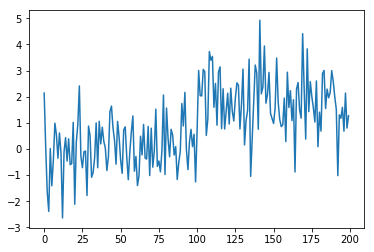

In [2]:
theta = 100
X = np.hstack((
    np.random.normal(loc=0, scale=1, size=theta),
    np.random.normal(loc=2, scale=1, size=100))
)
plot(X)

Заготовка для класса, реализующего статистику для обнаружения разладки, представлена ниже. Вам необходимо расширять этот класс.

In [3]:
class Stat(object):
    def __init__(self, threshold, direction="unknown", init_stat=0.0):
        self._direction = str(direction)
        self._threshold = float(threshold)
        self._stat = float(init_stat)
        self._alarm = self._stat / self._threshold
    
    @property
    def direction(self):
        return self._direction

    @property
    def stat(self):
        return self._stat
        
    @property
    def alarm(self):
        return self._alarm
        
    @property
    def threshold(self):
        return self._threshold
    
    def update(self, **kwargs):
        # Statistics may use any of the following kwargs:
        #   ts - timestamp for the value
        #   value - original value
        #   mean - current estimated mean
        #   std - current estimated std
        #   adjusted_value - usually (value - mean) / std
        # Statistics call this after updating '_stat'
        self._alarm = self._stat / self._threshold

**Задание 1.** Вычислите отношение правдоподобия для элемента выборки $X_i$. Реализуйте процедуру подсчета отношения правдоподобия для этого элемента выборки в предположении, что данные нормальны.

In [5]:
### your code here

In [6]:
from scipy.stats import norm

In [7]:
# Вариант 1 заключается в том, что вычисляются правдоподобия выборки с помощью функций,
# предоставляемых библиотекой scipy.stats
def normal_likelihood(value, mean_0, mean_8, std):
    return np.log(norm.pdf(value, mean_0, std) / 
                  norm.pdf(value, mean_8, std))

In [9]:
# Вариант 2 заключается в том, что можно упростить выражение,
# вычислив правдоподобие вручную -- оно выражается формулой, реализованной в коде
def normal_likelihood_explicit(value, mean_0, mean_8, std):
    return (value - (mean_0 + mean_8) / 2.) * (mean_0 - mean_8) / std ** 2

**Задание 2.** Постройте статистику кумулятивных сумм для обнаружения разладки в среднем значении процесса $X_n$. В какой момент $\tau$ следует подавать сигнал тревоги об обнаружении разладки?

In [10]:
### your code here

In [17]:
class Cusum(Stat):
    def __init__(self, mean_0, mean_8, std,
                 threshold, direction="unknown", init_stat=0.0):
        self.mean_0 = mean_0
        self.mean_8 = mean_8
        self.std = std
        super(Cusum, self).__init__(threshold, direction, init_stat)
        
    def update(self, value):
        zeta_k = normal_likelihood(value, self.mean_0, self.mean_8,
                                  self.std)
        self._stat = max(0, self._stat + zeta_k)
        super(Cusum, self).update()

In [18]:
stat_trajectory = []
mean_0 = 2.
mean_8 = 0.
std = 1.

cusum = Cusum(mean_0, mean_8, std, 100.)
for x_k in X:
    cusum.update(x_k)
    stat_trajectory.append(cusum._alarm)

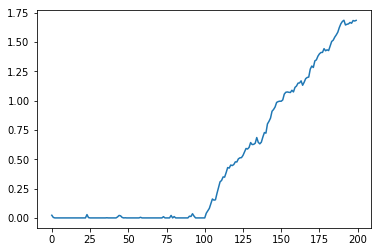

In [19]:
plot(stat_trajectory)

**Задание 3.** Проведите моделирование Монте-Карло для подсчета средней величины задержки в обнаружении разладки для заданных данных. 

_Подсказка:_ сгенерируйте $N$ независимых выборок, для каждой из них вычислите значения статистики кумулятивных сумм и момент подачи тревоги $\tau$. Полученные _задержки_ $\tau - \theta$ усредните.

In [20]:
### your code here

In [21]:
mean_0 = 1.
mean_8 = 0.
std = 1.

delays = []
for i in xrange(1000):
    
    theta = 100
    X = np.hstack((
        np.random.normal(loc=mean_8, scale=std, size=theta),
        np.random.normal(loc=mean_0, scale=std, size=100))
    )
    cusum = Cusum(mean_0, mean_8, std, 30.)
    for k, x_k in enumerate(X):
        cusum.update(x_k)
        if cusum._alarm >= 1 and k >= theta:
            break
    delays.append(k - theta)

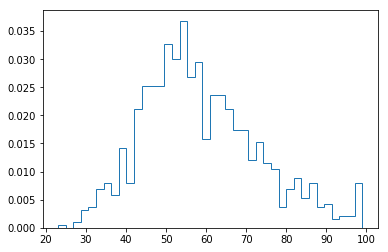

In [22]:
_ = hist(delays, bins=40, normed=1, histtype='step')

**Задание 4.** Проведите моделирование Монте-Карло для подсчета зависимости средней величины задержки в обнаружении разладки, которая появляется в момент времени $\theta = 0$, от значения порога срабатывания $h$. Отобразите полученную зависимость.

_Подсказка:_ для нескольких значений порога срабатывания $h$ сгенерируйте $N$ независимых выборок из распределения _с разладкой_ $\mathrm{P}_{0}$, для каждой из них вычислите значения статистики кумулятивных сумм и момент подачи тревоги $\tau$. Полученные _задержки_ $\tau - \theta$ усредните.

In [7]:
### your code here

In [35]:
mean_0 = 1.
mean_8 = 0.
std = 1.

thresholds = np.arange(10., 100., 5.)
delays = []
delays_std = []
for h in thresholds:
    
    delays_for_h = []
    for i in xrange(1000):

        theta = 100
        X = np.hstack((
            np.random.normal(loc=mean_8, scale=std, size=theta),
            np.random.normal(loc=mean_0, scale=std, size=100))
        )
        cusum = Cusum(mean_0, mean_8, std, h)
        for k, x_k in enumerate(X):
            cusum.update(x_k)
            if cusum._alarm >= 1 and k >= theta:
                break
        delays_for_h.append(k - theta)
    delays.append(np.mean(delays_for_h))
    delays_std.append(np.std(delays_for_h))

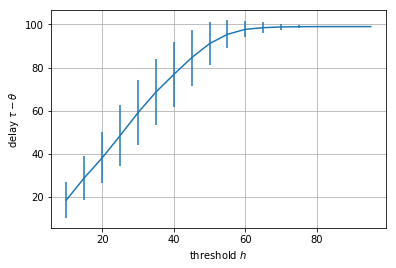

In [40]:
errorbar(thresholds, delays, yerr=delays_std)
xlabel('threshold $h$')
ylabel('delay $\\tau - \\theta$')
grid('on')

## Часть 2. Временные ряды с неизвестными характеристиками

В этой части задания вам необходимо разработать процедуру обнаружения разладки для данных, распределение которых вам неизвестно. Вам задан набор данных `seminar.train_data`. Процедура чтения реализована для вас.

In [56]:
from datasets import read_simple_dataset
from itertools import izip

In [57]:
with open('seminar.train_data') as f:
    data, changepoint, targets = read_simple_dataset(f, keep_target=True)

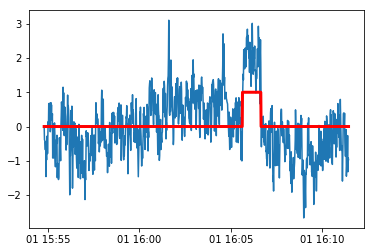

In [58]:
timestamps, values, changepoint = [], [], []
for (ts, value), cp_indicator in izip(data[1], targets[1]):
    timestamps.append(ts)
    values.append(value)
    changepoint.append(cp_indicator)
plot(timestamps, values)
plot(timestamps, changepoint, 'r', linewidth=3)

**Задание 1.** Модифицируйте процедуру кумулятивных сумм для случая, когда среднее значение временного ряда после разладки неизвестно.

Для решения этой задачи заметим, что у нас, вообще говоря, нет информации о среднем значении выданного временного ряда. Поэтому разумным будет оценить это значение с помощью какой-нибудь простой процедуры, например, экспоненциально взвешенного скользящего среднего (см. Задание 2).

Кумулятивные суммы при этом должны принимать в качестве параметра уже не точное значение среднего после разладки, а относительное отклонение в среднем значении такое, что $\mu_0 = \mu_{\infty} + \Delta$.

In [41]:
### your code here

In [43]:
class AdjustedCusum(Stat):
    def __init__(self, mean_diff,
                 threshold, direction="unknown", init_stat=0.0):
        self.mean_diff = mean_diff
        super(AdjustedCusum, self).__init__(threshold, direction, init_stat)
        
    def update(self, value):
        zeta_k = normal_likelihood(value, mean_diff, 0., 1.)
        self._stat = max(0, self._stat + zeta_k)
        super(AdjustedCusum, self).update()

In [45]:
theta = 100
X = np.hstack((
    np.random.normal(loc=0, scale=1, size=theta),
    np.random.normal(loc=2, scale=1, size=100))
)

mean = 0.
var = 1.
alpha = 0.05
beta = 0.005
mean_diff = 1.0

stat_trajectory = []

cusum = AdjustedCusum(mean_diff, 30.)
for k, x_k in enumerate(X):
    cusum.update(x_k)
    stat_trajectory.append(cusum._stat)

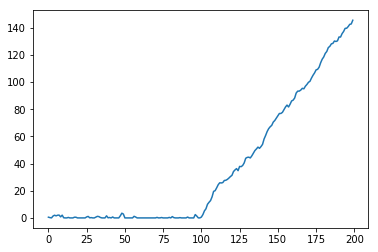

In [46]:
plot(stat_trajectory)

**Задание 2.** Реализуйте процедуру оценивания среднего значения временного ряда с помощью скользящего среднего. Постройте статистику кумулятивных сумм для обнаружения разладки в среднем значении процесса $X_n$. В какой момент $\tau$ следует подавать сигнал тревоги об обнаружении разладки?

In [12]:
### your code here

Разумным будет следующий алгоритм обнаружения разладки временного ряда $X_1, \ldots, X_n, \ldots$: 
- В каждый новый момент времени $t$ по вновь поступившему наблюдению $X_t$ производится вычисление стандартизованного и центрированного значения $Z_t = (X_t - \hat{\mu_{t-1}}) / \hat{\sigma_{t-1}}$, где $\hat{\mu_{t-1}}$ и $\hat{\sigma}^2_{t-1}$ - оценки среднего и дисперсии с помощью экспоненциального сглаживания, полученная по наблюдениям до момента времени $t-1$ включительно
- Переоценить среднее значение новыми данными согласно $\hat{\mu}_{t} = (1 - \alpha) \hat{\mu}_{t - 1} + \alpha X_t$
- Переоценить дисперсию новыми данными согласно $\hat{\sigma}^2_{t} = (1 - \beta) \hat{\sigma}^2_{t - 1} + \beta (X_t - \hat{\mu}_{t})^2$

In [47]:
# Тут реализована модификация статистики взвешенного экспоненциального среднего.
class MeanExpNoDataException(Exception):
    pass


class MeanExp(object):
    def __init__(self, new_value_weight, load_function=median):
        self._load_function = load_function
        self._new_value_weight = new_value_weight
        self.load([])

    @property
    def value(self):
        if self._weights_sum <= 1:
            raise MeanExpNoDataException('self._weights_sum <= 1')
        return self._values_sum / self._weights_sum

    def update(self, new_value, **kwargs):
        self._values_sum = (1 - self._new_value_weight) * self._values_sum + new_value
        self._weights_sum = (1 - self._new_value_weight) * self._weights_sum + 1.0

    def load(self, old_values):
        if old_values:
            old_values = [value for ts, value in old_values]
            mean = float(self._load_function(old_values))
            self._weights_sum = min(float(len(old_values)), 1.0 / self._new_value_weight)
            self._values_sum = mean * self._weights_sum
        else:
            self._values_sum = 0.0
            self._weights_sum = 0.0

In [48]:
theta = 100
X = np.hstack((
    np.random.normal(loc=0, scale=1, size=theta),
    np.random.normal(loc=2, scale=1, size=100))
)

mean = 0.
var = 1.
alpha = 0.05
beta = 0.005
mean_diff = 1.0

stat_trajectory, mean_values, var_values = [], [], []

mean_exp = MeanExp(new_value_weight=alpha)
var_exp = MeanExp(new_value_weight=beta)
cusum = AdjustedCusum(mean_diff, 30.)
for k, x_k in enumerate(X):
    try:
        mean_estimate = mean_exp.value
    except MeanExpNoDataException:
        mean_estimate = 0.
    
    try:
        var_estimate = var_exp.value
    except MeanExpNoDataException:
        var_estimate = 1.
    
    adjusted_value = (x_k - mean_estimate) / np.sqrt(var_estimate)
    cusum.update(adjusted_value)
    
    mean_exp.update(x_k)
    diff_value = (x_k - mean) ** 2
    var_exp.update(diff_value)
    
    stat_trajectory.append(cusum._stat)
    mean_values.append(mean_estimate)
    var_values.append(np.sqrt(var_estimate))

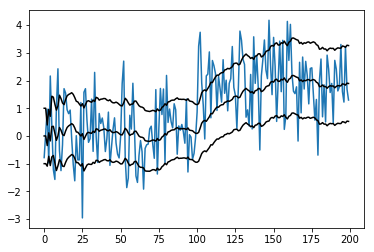

In [49]:
plot(X)
plot(np.array(mean_values), 'k')
plot(np.array(mean_values) + np.sqrt(var_values), 'k')
plot(np.array(mean_values) - np.sqrt(var_values), 'k')

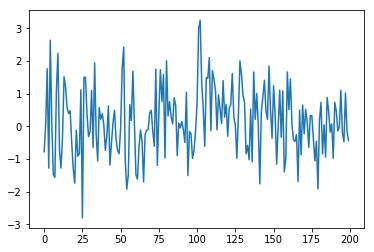

In [50]:
plot( (X - np.array(mean_values)) / np.sqrt(var_values))

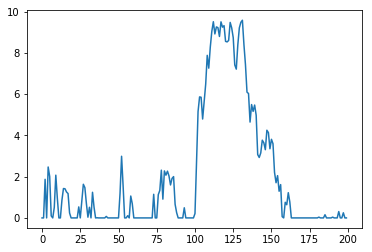

In [51]:
plot(stat_trajectory)

In [60]:
mean = 0.
var = 1.
alpha = 0.01
beta = 0.001
mean_diff = 1.0
    
stat_trajectory, mean_values, var_values = [], [], []
timestamps, values, changepoint = [], [], []

mean_exp = MeanExp(new_value_weight=alpha)
var_exp = MeanExp(new_value_weight=beta)
cusum = AdjustedCusum(mean_diff, 30.)
for (ts, x_k), cp_indicator in izip(data[1], targets[1]):
    timestamps.append(ts)
    values.append(x_k)
    try:
        mean_estimate = mean_exp.value
    except MeanExpNoDataException:
        mean_estimate = 0.
    
    try:
        var_estimate = var_exp.value
    except MeanExpNoDataException:
        var_estimate = 1.
    
    adjusted_value = (x_k - mean_estimate) / np.sqrt(var_estimate)
    cusum.update(adjusted_value)
    
    mean_exp.update(x_k)
    diff_value = (x_k - mean) ** 2
    var_exp.update(diff_value)
    
    stat_trajectory.append(cusum._stat)
    mean_values.append(mean_estimate)
    var_values.append(np.sqrt(var_estimate))

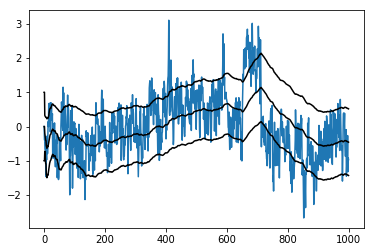

In [61]:
plot(values)
plot(np.array(mean_values), 'k')
plot(np.array(mean_values) + np.sqrt(var_values), 'k')
plot(np.array(mean_values) - np.sqrt(var_values), 'k')

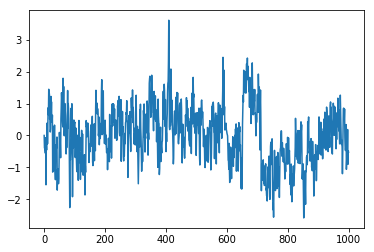

In [62]:
plot( (values - np.array(mean_values)) / np.sqrt(var_values))

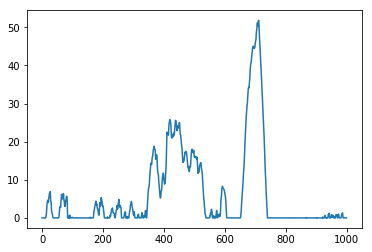

In [63]:
plot(stat_trajectory)

**Задание 3.** Постройте статистику Ширяева-Робертса для обнаружения разладки в дисперсии временного ряда.

Данные $X_1, \ldots, X_n$ порождены нормальным $\mathcal{N}(0, \sigma^2_{\infty})$ распределением до момента появления разладки, и нормальным $\mathcal{N}(0, \sigma^2_{0})$ распределением после момента появления разладки. Момент разладки $\theta$ -- неизвестная величина.

In [13]:
### your code here

Формально, необходимо снова подсчитать отношение правдоподобия и получить аналитическую формулу. Но мы воспользуемся тем фактом, что, если $x \sim N(\mu, \sigma^2)$, то $\mathrm{E} (x - \mu)^2 = \sigma^2$, и обычной формулой для правдоподобия (предполагая _грубо_, что $(x - \mu)^2$ - нормальная величина, у которой надо искать разладку в среднем значении).

In [79]:
class AdjustedShiryaevRoberts(Stat):
    def __init__(self, mean_diff, threshold, max_stat=float("+inf"), init_stat=0.0):
        super(AdjustedShiryaevRoberts, self).__init__(threshold,
                                                      direction="up",
                                                      init_stat=init_stat)
        self._mean_diff = mean_diff
        self._max_stat = max_stat

    def update(self, adjusted_value, **kwargs):
        likelihood = np.exp(self._mean_diff * (adjusted_value - self._mean_diff / 2.))
        self._stat = min(self._max_stat, (1. + self._stat) * likelihood)
        Stat.update(self)

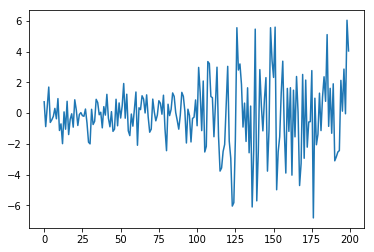

In [80]:
theta = 100
X = np.hstack((
    np.random.normal(loc=0, scale=1, size=theta),
    np.random.normal(loc=0, scale=3, size=100))
)
plot(X)

In [96]:
stat_trajectory = []
sigma_0 = 3.
sigma_8 = 1.
mean = 0.
sigma_diff = sigma_0 ** 2 - sigma_8 ** 2

sr = AdjustedShiryaevRoberts(sigma_diff, 1000., max_stat=1e6)
for x_k in X:
    diff_value = (x_k - mean) ** 2
    sr.update(diff_value)
    stat_trajectory.append(sr._stat)

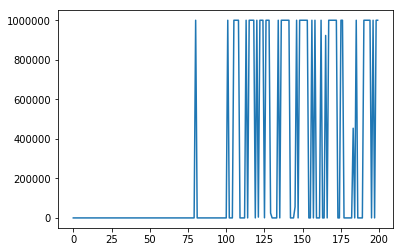

In [97]:
plot(stat_trajectory)

**Задание 4.** Модифицируйте процедуру обнаружения разладки с помощью статистики Ширяева-Робертса для обнаружения разладки в дисперсии временного ряда, заданного данными из файлов. Подсказка: постройте вначале процедуру оценивания значения дисперсии до момента разладки, а затем воспользуйтесь идеей из Задания 1.

In [98]:
with open('seminar_var.train_data') as f:
    data_var, changepoint_var, targets_var = read_simple_dataset(f, keep_target=True)

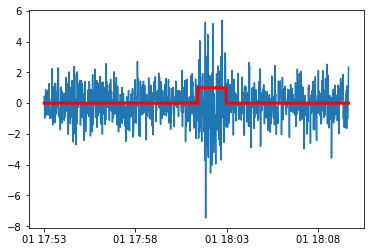

In [99]:
timestamps, values, changepoint = [], [], []
for (ts, value), cp_indicator in izip(data_var[0], targets_var[0]):
    timestamps.append(ts)
    values.append(value)
    changepoint.append(cp_indicator)
plot(timestamps, values)
plot(timestamps, changepoint, 'r', linewidth=3)

In [34]:
### your code here

Идея решения заключается в следующем:
- Разладка в дисперсии означает высокое значение разности оценки $\hat{\sigma}^2_{t}$ и значения $(X_t - \hat{\mu}_{t})^2$, поэтому именно эту разность $\hat{\sigma}^2_{t} - (X_t - \hat{\mu}_{t})^2$ мы будем подавать на вход процедуре Ширяева-Робертса (настроенной на поиск разладки "на увеличение")

Остальные шаги алгоритма полностью соответствуют случаю неизвестных моментов временного ряда:
- Переоценить среднее значение новыми данными согласно $\hat{\mu}_{t} = (1 - \alpha) \hat{\mu}_{t - 1} + \alpha X_t$
- Переоценить дисперсию новыми данными согласно $\hat{\sigma}^2_{t} = (1 - \beta) \hat{\sigma}^2_{t - 1} + \beta (X_t - \hat{\mu}_{t})^2$

In [195]:
alpha = 0.01
beta = 0.05
sigma_diff = 2.0

stat_trajectory, mean_values, var_values, diff_values = [], [], [], []
timestamps, values, changepoint = [], [], []

mean_exp = MeanExp(new_value_weight=alpha)
var_exp = MeanExp(new_value_weight=beta)
sr = AdjustedShiryaevRoberts(sigma_diff, 1000., max_stat=1e9)
for (ts, x_k), cp_indicator in izip(data_var[2], targets_var[2]):
    timestamps.append(ts)
    values.append(x_k)
    try:
        mean_estimate = mean_exp.value
    except MeanExpNoDataException:
        mean_estimate = 0.
    
    try:
        var_estimate = var_exp.value
    except MeanExpNoDataException:
        var_estimate = 1.
    
    predicted_diff_value = (x_k - mean_estimate) ** 2
    predicted_diff_mean = var_estimate
    sr.update(predicted_diff_value - predicted_diff_mean)
    diff_values.append(predicted_diff_value - predicted_diff_mean)
    
    mean_exp.update(x_k)
    diff_value = (x_k - mean_estimate) ** 2
    var_exp.update(diff_value)
    
    stat_trajectory.append(sr._stat)
    mean_values.append(mean_estimate)
    var_values.append(np.sqrt(var_estimate))

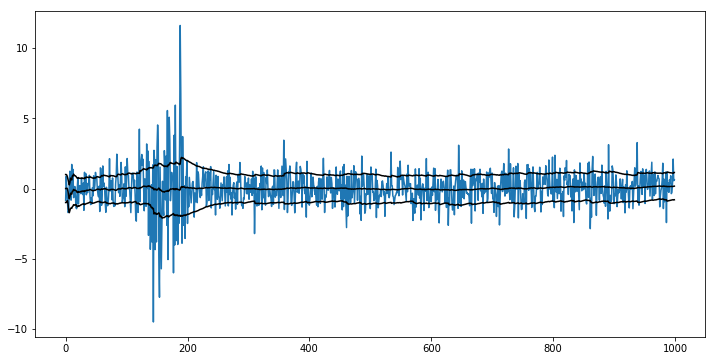

In [196]:
figure(figsize=(12, 6))
plot(values)
plot(np.array(mean_values), 'k')
plot(np.array(mean_values) + np.sqrt(var_values), 'k')
plot(np.array(mean_values) - np.sqrt(var_values), 'k')

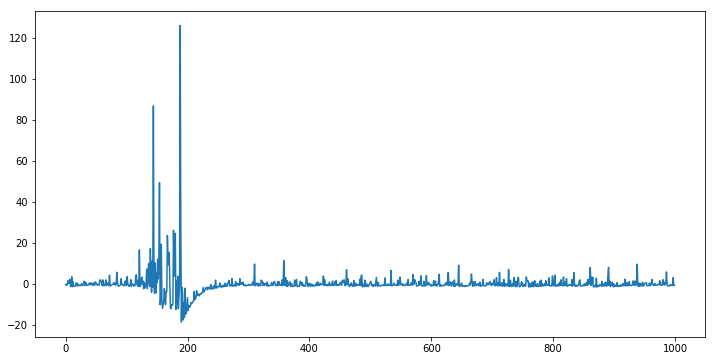

In [197]:
figure(figsize=(12, 6))
plot(diff_values)

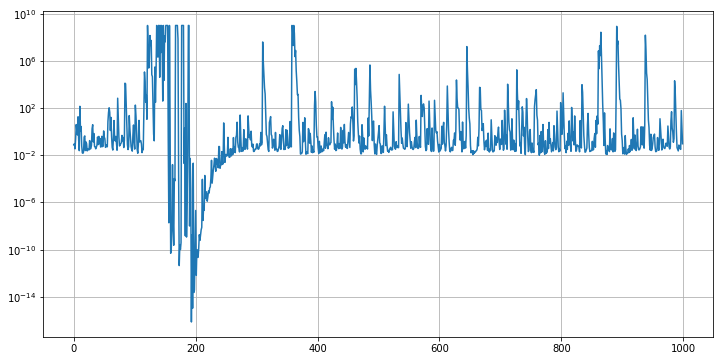

In [200]:
figure(figsize=(12, 6))
semilogy(stat_trajectory)
grid('on')